# ML_SP22_Project_3 (CNN)

### Due Date: 5/16 23:59 pm

In [107]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image

### The goal for this Project is to practice running CNN using a set of dog and cat image

***Make sure you fill in the blank inside the TODO section and try at least two different choices for the following parameters. Summarize your findings briefly at the end of the notebook***

1. Define a first model, try two epoch choices and two batch size.
2. Add dropout to the first model to see if it helps or not, pick one of the epoch and batch size you had before
3. Try a second model with slighly different model arhitecture
4. Summarize your findings

### Loading the datasets

In [109]:
# download the dogsvscats.zip, save it under your notebook directory
# or somewhere else, change base_dir to where you save the datasets
base_dir = "./dogsvscats"

In [110]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=32)

Found 2000 files belonging to 2 classes.


In [111]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=32)

Found 1000 files belonging to 2 classes.


In [112]:
test_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "test"),
        image_size=(180, 180),
        batch_size=1000)

Found 1000 files belonging to 2 classes.


In [113]:
images, labels = list(train_dataset.take(1))[0]
class_names = train_dataset.class_names

Text(0.5, 1.0, 'dog')

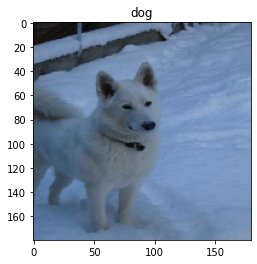

In [114]:
idx = 2
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(class_names[labels[idx].numpy()])

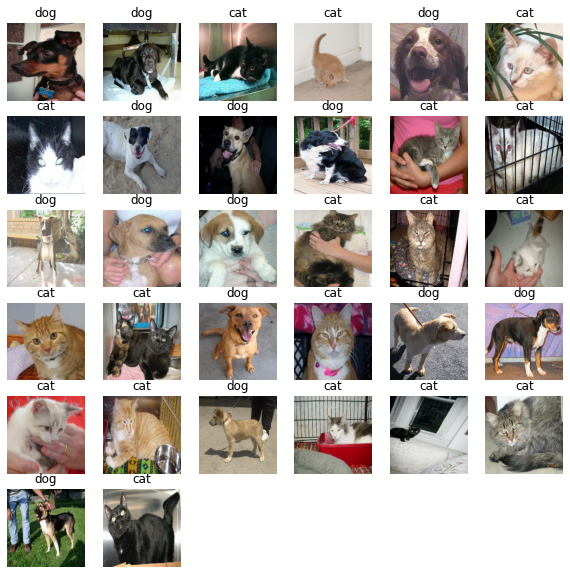

In [115]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

# Plotting the images
plt.show()

### Define your first CNN model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [93]:
# TODO: fill in the blank
inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [94]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_images.shape

(60000, 28, 28, 1)

### Comiple the model

In [95]:
# TODO: fill in the blank
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_9 (Batc  (None, 180, 180, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_27 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 87, 87, 64)        1849

### Running the first model

In [81]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=20, 
    validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 30s 455ms/step - loss: 1.1047 - accuracy: 0.5585 - val_loss: 0.6898 - val_accuracy: 0.5490
Epoch 2/20
63/63 [==============================] - 28s 446ms/step - loss: 0.6328 - accuracy: 0.6540 - val_loss: 0.6250 - val_accuracy: 0.6520
Epoch 3/20
63/63 [==============================] - 28s 447ms/step - loss: 0.5199 - accuracy: 0.7445 - val_loss: 0.5931 - val_accuracy: 0.7000
Epoch 4/20
63/63 [==============================] - 28s 446ms/step - loss: 0.4098 - accuracy: 0.8270 - val_loss: 0.5877 - val_accuracy: 0.7000
Epoch 5/20
63/63 [==============================] - 28s 449ms/step - loss: 0.2883 - accuracy: 0.8855 - val_loss: 0.7424 - val_accuracy: 0.6560
Epoch 6/20
63/63 [==============================] - 28s 445ms/step - loss: 0.1732 - accuracy: 0.9375 - val_loss: 0.7335 - val_accuracy: 0.7010
Epoch 7/20
63/63 [==============================] - 28s 448ms/step - loss: 0.1105 - accuracy: 0.9655 - val_loss: 0.9225 - val_accuracy: 0.6970

### Now, look at the testing dataset

In [82]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [83]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'dog')

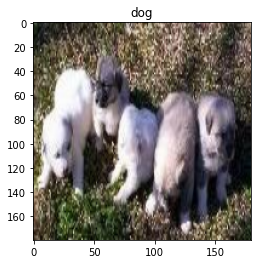

In [84]:
idx = 50
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [85]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [86]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [87]:
prediction = model.predict(img_batch)

In [88]:
print(prediction)

[[0.8381897]]


### Evaluate your first model out-of-sample

In [89]:
# TODO fill-in the blank here
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 65ms/step - loss: 3.6269 - accuracy: 0.6630
Test accuracy: 0.663


### 66.3% accuracy. Not  bad, but we may use Dropout to improve performance

In [90]:
inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Dropout(0.2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_8 (Batc  (None, 180, 180, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_24 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 87, 87, 64)        1849

In [91]:
history = model2.fit(
    train_dataset,
    epochs=20, 
    validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 30s 474ms/step - loss: 0.7936 - accuracy: 0.5140 - val_loss: 0.6901 - val_accuracy: 0.5430
Epoch 2/20
63/63 [==============================] - 30s 471ms/step - loss: 0.6463 - accuracy: 0.5930 - val_loss: 0.6813 - val_accuracy: 0.5530
Epoch 3/20
63/63 [==============================] - 30s 476ms/step - loss: 0.6237 - accuracy: 0.6355 - val_loss: 0.6317 - val_accuracy: 0.6240
Epoch 4/20
63/63 [==============================] - 30s 475ms/step - loss: 0.5530 - accuracy: 0.7110 - val_loss: 0.5957 - val_accuracy: 0.6810
Epoch 5/20
63/63 [==============================] - 31s 485ms/step - loss: 0.4864 - accuracy: 0.7605 - val_loss: 0.5790 - val_accuracy: 0.6960
Epoch 6/20
63/63 [==============================] - 30s 472ms/step - loss: 0.4033 - accuracy: 0.8140 - val_loss: 0.7790 - val_accuracy: 0.6550
Epoch 7/20
63/63 [==============================] - 30s 477ms/step - loss: 0.3232 - accuracy: 0.8600 - val_loss: 0.8131 - val_accuracy: 0.6790

In [92]:
test_images, test_labels = list(test_dataset.take(1))[0]
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 65ms/step - loss: 2.5483 - accuracy: 0.6790
Test accuracy: 0.679


### Using Dropout, our accuracy slightly increased to 67.9%

### Try different choices of epoch, batch size for your first model

In [96]:
# Type your code here
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=16)

validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=16)

history = model.fit(
    train_dataset,
    epochs=8, 
    validation_data=validation_dataset)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/8
125/125 [==============================] - 30s 236ms/step - loss: 0.8629 - accuracy: 0.5995 - val_loss: 0.6488 - val_accuracy: 0.6260
Epoch 2/8
125/125 [==============================] - 30s 237ms/step - loss: 0.6107 - accuracy: 0.6720 - val_loss: 0.5963 - val_accuracy: 0.6760
Epoch 3/8
125/125 [==============================] - 29s 236ms/step - loss: 0.4985 - accuracy: 0.7615 - val_loss: 0.6369 - val_accuracy: 0.6900
Epoch 4/8
125/125 [==============================] - 29s 235ms/step - loss: 0.3527 - accuracy: 0.8435 - val_loss: 0.6552 - val_accuracy: 0.7060
Epoch 5/8
125/125 [==============================] - 30s 237ms/step - loss: 0.2049 - accuracy: 0.9165 - val_loss: 1.0567 - val_accuracy: 0.6760
Epoch 6/8
125/125 [==============================] - 30s 237ms/step - loss: 0.1140 - accuracy: 0.9575 - val_loss: 1.6088 - val_accuracy: 0.6590
Epoch 7/8
125/125 [==============================] - 3

In [97]:
test_images, test_labels = list(test_dataset.take(1))[0]
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 67ms/step - loss: 1.9084 - accuracy: 0.6810
Test accuracy: 0.681


### Changing the epoch and batch size increased the accuracy further to 68.1%

### Try a second model with slightly different architecture (no need to be very complicated)

### We will implement a model without MaxPooling

In [116]:
# Type your code here
#
inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_12 (Bat  (None, 180, 180, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 176, 176, 64)      18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 174, 174, 128)     73856     
                                                          

In [119]:
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(
    train_dataset,
    epochs=5, 
    validation_data=validation_dataset)

Epoch 1/5
63/63 [==============================] - 115s 2s/step - loss: 1.6251 - accuracy: 0.5555 - val_loss: 0.7085 - val_accuracy: 0.5230
Epoch 2/5
63/63 [==============================] - 112s 2s/step - loss: 0.9124 - accuracy: 0.6580 - val_loss: 0.6579 - val_accuracy: 0.5940
Epoch 3/5
63/63 [==============================] - 112s 2s/step - loss: 0.4445 - accuracy: 0.8250 - val_loss: 0.6700 - val_accuracy: 0.6410
Epoch 4/5
63/63 [==============================] - 112s 2s/step - loss: 0.2245 - accuracy: 0.9430 - val_loss: 0.8818 - val_accuracy: 0.6640
Epoch 5/5
63/63 [==============================] - 111s 2s/step - loss: 0.0383 - accuracy: 0.9915 - val_loss: 1.2913 - val_accuracy: 0.6610


In [120]:
# TODO test your second model on out-of-sample data
test_images, test_labels = list(test_dataset.take(1))[0]
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 65ms/step - loss: 2.5483 - accuracy: 0.6790
Test accuracy: 0.679


### The model without MaxPooling provided an accuracy of 67.9%

### Summarize your findings below

In [ ]:
# Type your answers and comments here

### In this project, many things were uncovered about the neural network. For the first model, I have learned that adding a dropout layer can improve accuracy of the neural network. This is because dropout layers decrease the risk of overfitting to the data that it is given.

### We have also learned that decreasing the epoch and batch size can increase the neural networks accuracy. We can conclude that a small batch size allows our network to train better, with less variability.

### Lastly, with our last model without MaxPooling, I have found out that model fitting took significantly longer than the model without it. From this, we can see that pooling is faster to compute than convolutions